In [172]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
import math
import random

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,8)

In [173]:
df = pd.read_csv('amazon_co-ecommerce_sample.csv')

In [174]:
df.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

In [175]:
# Remove missing amazon_category_and_sub_category
df.dropna(subset=['amazon_category_and_sub_category', 'manufacturer'], inplace =True)

In [176]:
df.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      0
price                                          1296
number_available_in_stock                      2338
number_of_reviews                                12
number_of_answered_questions                    714
average_review_rating                            12
amazon_category_and_sub_category                  0
customers_who_bought_this_item_also_bought     1003
description                                     615
product_information                              55
product_description                             615
items_customers_buy_after_viewing_this_item    2881
customer_questions_and_answers                 8458
customer_reviews                                 15
sellers                                        2897
dtype: int64

In [177]:
df.count()

uniq_id                                        9306
product_name                                   9306
manufacturer                                   9306
price                                          8010
number_available_in_stock                      6968
number_of_reviews                              9294
number_of_answered_questions                   8592
average_review_rating                          9294
amazon_category_and_sub_category               9306
customers_who_bought_this_item_also_bought     8303
description                                    8691
product_information                            9251
product_description                            8691
items_customers_buy_after_viewing_this_item    6425
customer_questions_and_answers                  848
customer_reviews                               9291
sellers                                        6409
dtype: int64

In [178]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


# Explorative Data Analysis

In [179]:
df.count()

uniq_id                                        9306
product_name                                   9306
manufacturer                                   9306
price                                          8010
number_available_in_stock                      6968
number_of_reviews                              9294
number_of_answered_questions                   8592
average_review_rating                          9294
amazon_category_and_sub_category               9306
customers_who_bought_this_item_also_bought     8303
description                                    8691
product_information                            9251
product_description                            8691
items_customers_buy_after_viewing_this_item    6425
customer_questions_and_answers                  848
customer_reviews                               9291
sellers                                        6409
dtype: int64

In [180]:
df.nunique()

uniq_id                                        9306
product_name                                   9274
manufacturer                                   2444
price                                          2499
number_available_in_stock                        76
number_of_reviews                               185
number_of_answered_questions                     19
average_review_rating                            19
amazon_category_and_sub_category                255
customers_who_bought_this_item_also_bought     8125
description                                    7880
product_information                            9249
product_description                            7880
items_customers_buy_after_viewing_this_item    6243
customer_questions_and_answers                  846
customer_reviews                               9218
sellers                                        6085
dtype: int64

In [181]:
df.manufacturer.value_counts()

Disney            167
Oxford Diecast    156
Star Wars         120
Mattel            111
Hasbro            109
                 ... 
BENELIC             1
Cards               1
Imagingext          1
West5Products       1
Super Heroes        1
Name: manufacturer, Length: 2444, dtype: int64

In [182]:
# we have to remove Manufacturers with products counts

threshold = 50 # Anything that occurs less than this will be removed.
for manufacturer in df.columns:
    value_counts = df['manufacturer'].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    df['manufacturer'].replace(to_remove, np.nan, inplace=True)

In [183]:
df.manufacturer.value_counts()

Disney                           167
Oxford Diecast                   156
Star Wars                        120
Mattel                           111
Hasbro                           109
Playmobil                        108
The Puppet Company               108
MyTinyWorld                       93
Corgi                             90
Hornby                            87
Scalextric                        76
LEGO                              68
Pokémon                           65
Schleich                          64
Amscan                            63
Every-occasion-party-supplies     62
FunKo                             58
Papo                              57
Ravensburger                      56
Melissa & Doug                    55
Tamiya                            55
Bristol Novelties                 52
Intex                             52
Name: manufacturer, dtype: int64

In [184]:
# Checking data balance/proportion
share = df.manufacturer.value_counts().to_frame()
share["percent"] = (share.apply(lambda x: x/x.sum()*100).round(2))
display(share)



,manufacturer,percent
Disney,167,8.64
Oxford Diecast,156,8.07
Star Wars,120,6.21
Mattel,111,5.75
Hasbro,109,5.64
Playmobil,108,5.59
The Puppet Company,108,5.59
MyTinyWorld,93,4.81
Corgi,90,4.66
Hornby,87,4.50


In [185]:
# Remove missing amazon_category_and_sub_category
df.dropna(subset=['manufacturer'], inplace =True)

In [186]:
df.count()

uniq_id                                        1932
product_name                                   1932
manufacturer                                   1932
price                                          1631
number_available_in_stock                      1651
number_of_reviews                              1930
number_of_answered_questions                   1787
average_review_rating                          1930
amazon_category_and_sub_category               1932
customers_who_bought_this_item_also_bought     1712
description                                    1858
product_information                            1924
product_description                            1858
items_customers_buy_after_viewing_this_item    1393
customer_questions_and_answers                  181
customer_reviews                               1930
sellers                                        1216
dtype: int64

In [187]:
# Reformatting the number_of_reviews and price columns.
df['number_of_reviews'] = df['number_of_reviews'].str.replace(",", "").astype(float)

def mapprice(v):
    if pd.isnull(v):
        return 0
    try:
        return float(v[1:])
    except ValueError:
        return 0
    
df['price'] = df['price'].map(mapprice)

In [188]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
6,f74b562470571dfb689324adf236f82c,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,Hornby,24.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R4388-RailRoad-...,Product Description Hornby BR bogie passenger ...,Technical Details Item Weight222 g Product Dim...,Product Description Hornby BR bogie passenger ...,NaN,NaN,"High standard model, well worth the wait. Repl...","{""seller""=>{""Seller_name_1""=>""MyHobbyStore Ret..."
7,87bbb472ef9d90dcef140a551665c929,Hornby Santa's Express Train Set,Hornby,69.93,3 new,36.0,7.0,4.3 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8221-Gauge-Tra...,Product Description Inject a bit of Hornby mag...,Technical Details Item Weight1.2 Kg Product Di...,Product Description Inject a bit of Hornby mag...,http://www.amazon.co.uk/Hornby-R1151-Caledonia...,Can this train go backwards as well as forward...,Beautiful set // 5.0 // 3 Dec. 2015 // By\n ...,"{""seller""=>[{""Seller_name_1""=>""Toy Arena"", ""Se..."


Column: amazon_category_and_sub_category

This field is the ontological class given to the item in the record within Amazon's database. Amazon separates products out into a diverse range of categories, each subsetted and supersetted by other categories. The design of this ontology is controlled by both buyer concerns (categories need to be obviously useful to a consumer browsing the site and looking for products of a specific kind) and seller concerns (Amazon controls how listing a product on the site works category-by-category).

For this reason Amazon splits its categorization up into a tree structure. For example, one valid Amazon product classification is Sports Toys & Outdoor > Beach Toys > Airbeds & Inflating Devices. We need to take a look at how this categorization works to understand how to make use of it.

In [189]:
import numpy as np

def mapcategories(srs):
    if pd.isnull(srs):
        return []
    else:
        return [cat.strip() for cat in srs.split(">")]
    
category_lists = df['amazon_category_and_sub_category'].apply(mapcategories)
category_lists.map(lambda lst: len(lst)).value_counts()

3    971
2    597
4    359
5      5
Name: amazon_category_and_sub_category, dtype: int64

In [190]:
import networkx as nx
DG = nx.DiGraph()

category_lists.map(lambda cats: DG.add_nodes_from(cats))
category_lists.map(lambda cats: [DG.add_edge(cats[i], cats[i + 1]) for i in range(len(cats) - 1)])

print("The number of categorical links possible is {0}.".format(len(DG.edges())))

The number of categorical links possible is 135.


In [191]:
# print(list(nx.simple_cycles(DG)))
# df.iloc[
#     category_lists[category_lists.map(lambda lst: 'Beach Toys' in lst)].index
# ].head()[['product_name', 'amazon_category_and_sub_category']]

top = category_lists[category_lists.map(lambda c: len(c) > 0)].map(lambda l: l[0])
bottom = category_lists[category_lists.map(lambda c: len(c) > 0)].map(lambda l: l[-1])

print("There are {0} possible top-level (root) categories in this dataset.".format(len(set(top))))
print("There are {0} possible bottom-level (leaf) categories in this dataset.".format(len(set(bottom))))

df = df.assign(root_category=top.astype('category'), 
                           leaf_category=bottom.astype('category'))

There are 21 possible top-level (root) categories in this dataset.
There are 100 possible bottom-level (leaf) categories in this dataset.


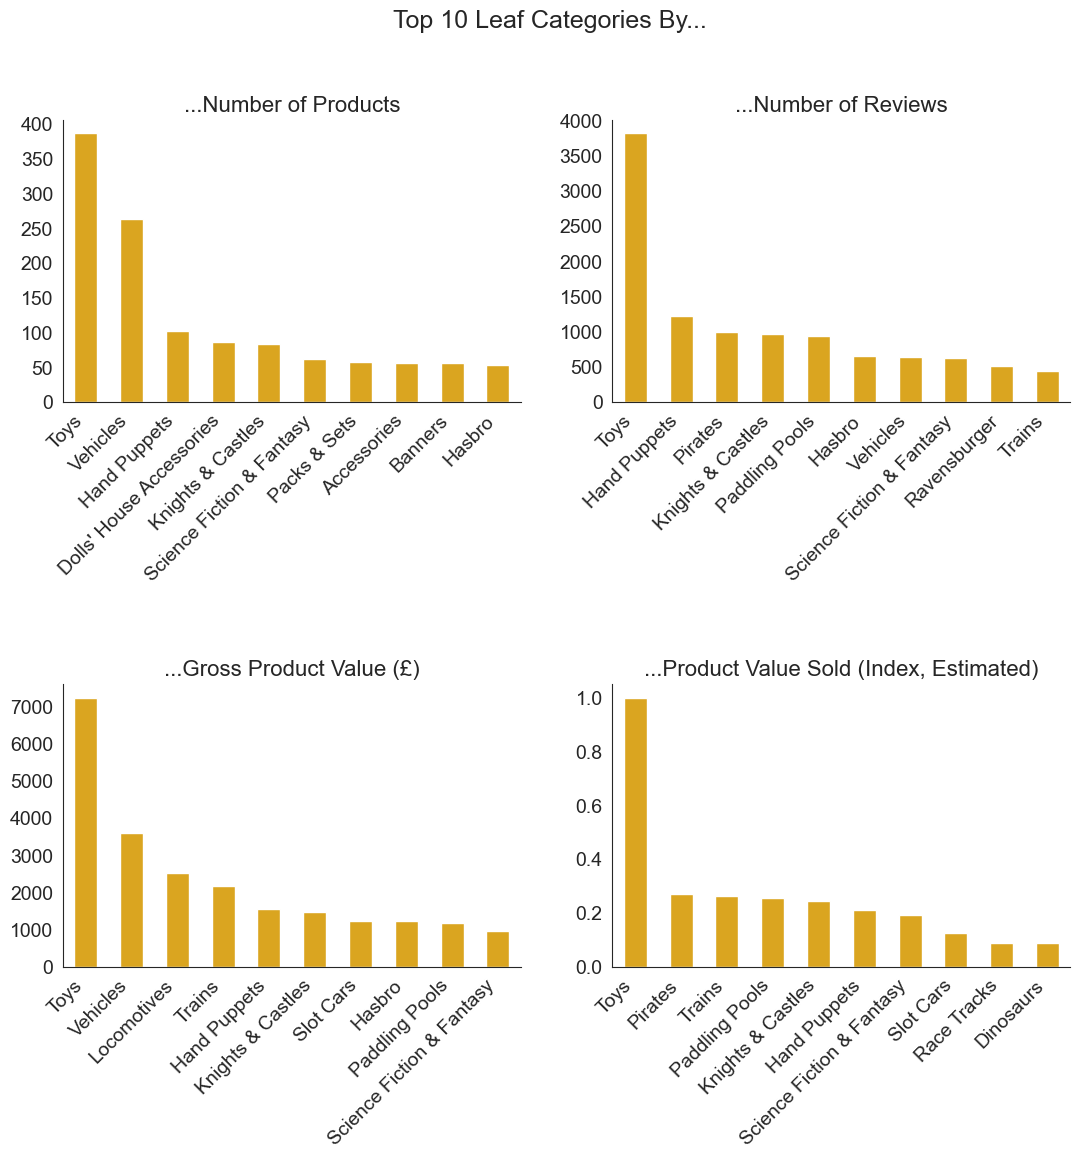

In [192]:
# Creating the plot.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(2, 2)
f.subplots_adjust(hspace=1)
plt.suptitle('Top 10 Leaf Categories By...', fontsize=18)

bar_kwargs = {'figsize': (13, 11), 'fontsize': 14, 'color': 'goldenrod'}

df['leaf_category'].value_counts().head(10).plot.bar(
    title='...Number of Products', ax=axarr[0][0], **bar_kwargs
)

(df.groupby('leaf_category')
     ['number_of_reviews']
     .sum()
     .sort_values(ascending=False)
     .rename_axis(None)
     .head(10)
     .plot.bar(
        title='...Number of Reviews', ax=axarr[0][1], **bar_kwargs
     ))

(df.groupby('leaf_category')
     ['price']
     .sum()
     .sort_values(ascending=False)
     .rename_axis(None)
     .head(10)
     .plot.bar(
        title='...Gross Product Value (£)', ax=axarr[1][0], **bar_kwargs
     ))

(df
     .assign(
         pval=df.apply(lambda p: p['price'] * p['number_of_reviews'], axis='columns')
     )
     .groupby('leaf_category')
     .sum()
     .pipe(lambda df: df.assign(pval=df['pval'] / df['pval'].max()))
     .pval
     .sort_values(ascending=False)
     .rename_axis(None)
     .head(10)
     .plot.bar(
         title='...Product Value Sold (Index, Estimated)', 
         ax=axarr[1][1], **bar_kwargs
     )
)

sns.despine()

for (a, b) in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    axarr[a][b].title.set_fontsize(16)
    axarr[a][b].set_xticklabels(axarr[a][b].get_xticklabels(), 
                                rotation=45, ha='right', fontsize=14)


In [193]:
df.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers,root_category,leaf_category
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Hobbies,Trains
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,NaN,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN,Hobbies,Trains
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,NaN,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN,Hobbies,Trains
6,f74b562470571dfb689324adf236f82c,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,Hornby,24.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R4388-RailRoad-...,Product Description Hornby BR bogie passenger ...,Technical Details Item Weight222 g Product Dim...,Product Description Hornby BR bogie passenger ...,NaN,NaN,"High standard model, well worth the wait. Repl...","{""seller""=>{""Seller_name_1""=>""MyHobbyStore Ret...",Hobbies,Trains
7,87bbb472ef9d90dcef140a551665c929,Hornby Santa's Express Train Set,Hornby,69.93,3 new,36.0,7.0,4.3 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8221-Gauge-Tra...,Product Description Inject a bit of Hornby mag...,Technical Details Item Weight1.2 Kg Product Di...,Product Description Inject a bit of Hornby mag...,http://www.amazon.co.uk/Hornby-R1151-Caledonia...,Can this train go backwards as well as forward...,Beautiful set // 5.0 // 3 Dec. 2015 // By\n ...,"{""seller""=>[{""Seller_name_1""=>""Toy Arena"", ""Se...",Hobbies,Trains


In [194]:
df.drop(['uniq_id','number_available_in_stock','customers_who_bought_this_item_also_bought',
        'description','product_information','product_description','items_customers_buy_after_viewing_this_item',
       'customer_questions_and_answers','customer_reviews','sellers'], axis=1, inplace=True)

In [195]:
df.count()

product_name                        1932
manufacturer                        1932
price                               1932
number_of_reviews                   1930
number_of_answered_questions        1787
average_review_rating               1930
amazon_category_and_sub_category    1932
root_category                       1932
leaf_category                       1932
dtype: int64

In [196]:
df.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,root_category,leaf_category
0,Hornby 2014 Catalogue,Hornby,3.42,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,1.0,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,3.0,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains
6,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,Hornby,24.99,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains
7,Hornby Santa's Express Train Set,Hornby,69.93,36.0,7.0,4.3 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains


In [197]:

def splitrating(rating):
    try:
        return rating.split(" ")[0]
    except AttributeError:
        return np.nan

df['average_review_rating'] = df['average_review_rating'].map(splitrating)
df['average_review_rating'] = df['average_review_rating'].astype(float)

def recommend_me(item):
    tokens = item.split(" ")
    tokens = [t.lower() for t in tokens]
    df = df[df.product_name.map(lambda name: all(n in name.lower() for n in tokens))]
    
    if len(df[df['average_review_rating'] >= 4.0]) == 0:
        return df.sort_values(by='average_review_rating').iloc[0]
    else:
        return df[df['average_review_rating'] >= 4.0].sort_values(by='number_of_reviews').iloc[0]

In [ ]:
df.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,root_category,leaf_category
0,Hornby 2014 Catalogue,Hornby,3.42,15.0,1.0,4.9,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.99,1.0,2.0,5.0,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.19,3.0,2.0,4.7,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains
6,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,Hornby,24.99,2.0,1.0,4.5,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains
7,Hornby Santa's Express Train Set,Hornby,69.93,36.0,7.0,4.3,Hobbies > Model Trains & Railway Sets > Rail V...,Hobbies,Trains


In [ ]:
df.describe()

,price,number_of_reviews,number_of_answered_questions,average_review_rating
count,1932.000000,1930.000000,1787.000000,1930.000000
mean,16.869363,8.734715,1.727476,4.727254
std,28.528492,20.974128,1.796831,0.356780
min,0.000000,1.000000,1.000000,2.300000
25%,2.800000,1.000000,1.000000,4.500000
50%,9.700000,2.000000,1.000000,5.000000
75%,19.300000,7.000000,2.000000,5.000000
max,379.890000,337.000000,14.000000,5.000000


In [ ]:
# describing categorical variable
df.describe(include=[np.object])

C:\Users\toluw\AppData\Local\Temp\ipykernel_17840\4280537798.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,product_name,manufacturer,amazon_category_and_sub_category
count,1932,1932,1932
unique,1928,23,106
top,INTEX Inflatable Swimming Paddling Play Pool 3...,Disney,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...
freq,2,167,263


In [ ]:
df.nunique()

product_name                        1928
manufacturer                          23
price                                847
number_of_reviews                     99
number_of_answered_questions          14
average_review_rating                 13
amazon_category_and_sub_category     106
root_category                         21
leaf_category                        100
dtype: int64

In [ ]:
import statsmodels.formula.api as smf

In [200]:
model = smf.ols('average_review_rating  ~ C(manufacturer) + number_of_reviews+ number_of_answered_questions + price', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     average_review_rating   R-squared:                       0.079
Model:                               OLS   Adj. R-squared:                  0.066
Method:                    Least Squares   F-statistic:                     6.014
Date:                   Fri, 16 Dec 2022   Prob (F-statistic):           6.40e-19
Time:                           22:06:12   Log-Likelihood:                -626.85
No. Observations:                   1785   AIC:                             1306.
Df Residuals:                       1759   BIC:                             1448.
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            4.7491      0.048     98.389      0.000       4.654       4.844
C(manufacturer)[T.Bristol Novelties]                -0.1693      0.069     -2.438      0.015      -0.305      -0.033
C(manufacturer)[T.Corgi]                             0.0630      0.061      1.031      0.303      -0.057       0.183
C(manufacturer)[T.Disney]                           -0.0219      0.055     -0.397      0.691      -0.130       0.086
C(manufacturer)[T.Every-occasion-party-supplies]     0.0663      0.066      1.002      0.316      -0.063       0.196
C(manufacturer)[T.FunKo]                             0.0775      0.068      1.141      0.254      -0.056       0.211
C(manufacturer)[T.Hasbro]                           -0.1441      0.059     -2.424      0.015      -0.261      -0.027
C(manufacturer)[T.Hornby]                           -0.0338      0.062     -0.542      0.588      -0.156       0.088
C(manufacturer)[T.Intex]                            -0.1767      0.070     -2.536      0.011      -0.313      -0.040
C(manufacturer)[T.LEGO]                             -0.0024      0.065     -0.037      0.971      -0.129       0.124
C(manufacturer)[T.Mattel]                           -0.0185      0.059     -0.314      0.753      -0.134       0.097
C(manufacturer)[T.Melissa & Doug]                    0.0130      0.067      0.193      0.847      -0.119       0.145
C(manufacturer)[T.MyTinyWorld]                       0.1815      0.065      2.786      0.005       0.054       0.309
C(manufacturer)[T.Oxford Diecast]                    0.0583      0.055      1.051      0.293      -0.050       0.167
C(manufacturer)[T.Papo]                              0.0659      0.067      0.987      0.324      -0.065       0.197
C(manufacturer)[T.Playmobil]                        -0.0333      0.059     -0.563      0.574      -0.149       0.083
C(manufacturer)[T.Pokémon]                           0.0445      0.065      0.688      0.492      -0.082       0.171
C(manufacturer)[T.Ravensburger]                      0.0369      0.067      0.550      0.582      -0.095       0.168
C(manufacturer)[T.Scalextric]                       -0.0887      0.062     -1.421      0.155      -0.211       0.034
C(manufacturer)[T.Schleich]                          0.0720      0.066      1.092      0.275      -0.057       0.201
C(manufacturer)[T.Star Wars]                         0.0322      0.058      0.556      0.578      -0.082       0.146
C(manufacturer)[T.Tamiya]                            0.1473      0.067      2.204      0.028       0.016       0.278
C(manufacturer)[T.The Puppet Company]                0.0270      0.059      0.459      0.646      -0.088       0.142
number_o

Manufacturers by price

In [201]:
df['manufacturer'].value_counts().head().index

Index(['Disney', 'Oxford Diecast', 'Star Wars', 'Mattel', 'Hasbro'], dtype='object')

c:\Users\toluw\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


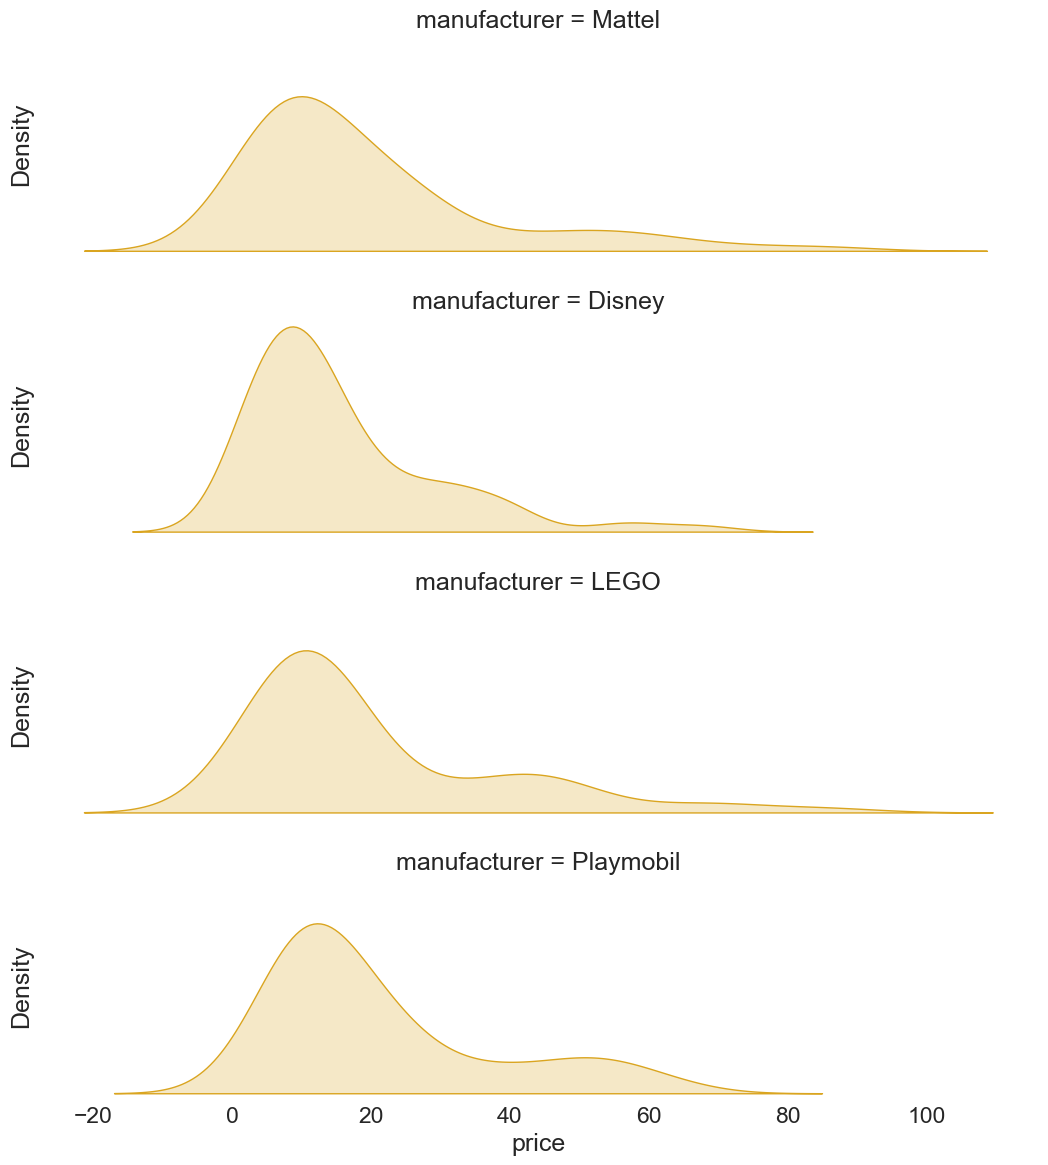

In [202]:
df = (df[
        df['manufacturer'].isin(
            ['Disney', 'Playmobil', 'LEGO', 'Hot Wheels', 'Mattel']
        )
      ]
         .query('price <= 100').query('price > 0'))

with sns.plotting_context("notebook", font_scale=1.5):
    g = sns.FacetGrid(df, row='manufacturer', hue='manufacturer', size=3, aspect=3.8)
    g.map(sns.kdeplot, "price", color='goldenrod', clip_on=False, shade=True)
    g.despine(bottom=True, left=True)
    g.set(yticks=[])